<a href="https://colab.research.google.com/github/lelyta30/PCVK_GENAP_2023/blob/main/week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT ASSIGMENT**

Name : Lelyta Salsabila

Class : 3I

NIM : 1941720026

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

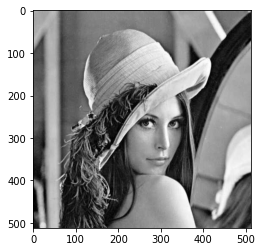

In [32]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')


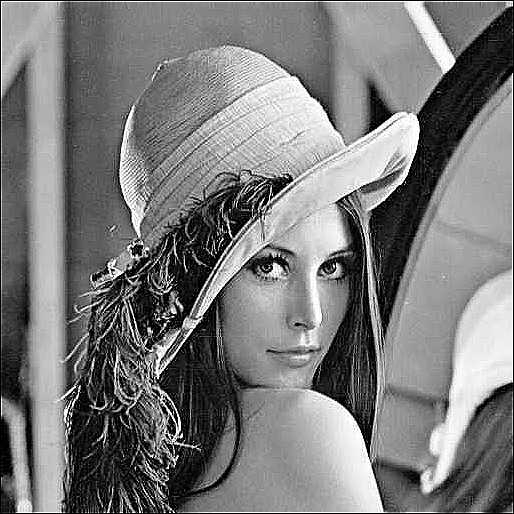

In [33]:
kernel_sharpen = np.array([
      [0,-1,0],
      [-1,5,-1],
      [0,-1,0]
  ])

def convolution2d(image, kernel, stride, padding):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1

    output = np.zeros((out_rows, out_cols))

    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for row in range(out_rows):
        for col in range(out_cols):
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    irow = row * stride + krow
                    icol = col * stride + kcol

                    sum += kernel[krow, kcol] * padded_image[irow, icol]

            output[row, col] = sum

    return output

filtered_image = convolution2d(img_gray, kernel_sharpen,1,2)
cv2_imshow(filtered_image)

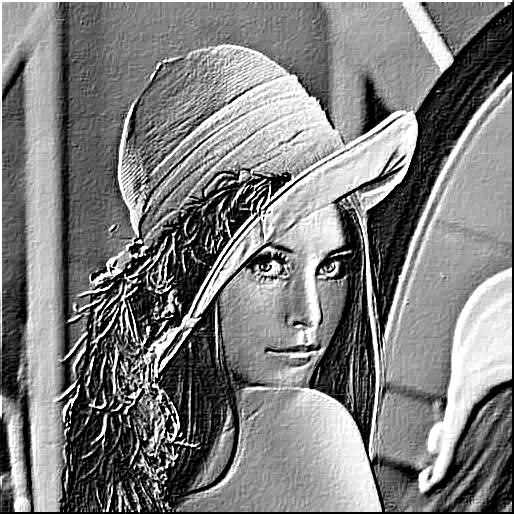

In [34]:
kernel_emboss = np.array([
      [-2,-1,0],
      [-1,1,1],
      [0,1,2]
  ])

filtered_image2 = convolution2d(img_gray, kernel_emboss,1,2)
cv2_imshow(filtered_image2)

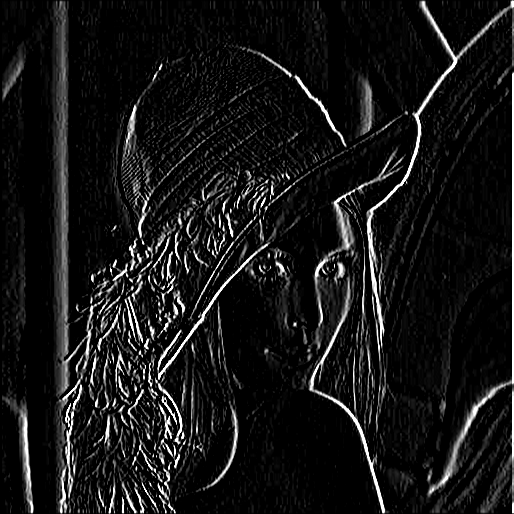

In [35]:
kernel_left_sobel_edge = np.array([
      [1,0,-1],
      [2,0,-2],
      [1,0,-1]
  ])

filtered_image3 = convolution2d(img_gray, kernel_left_sobel_edge,1,2)
cv2_imshow(filtered_image3)

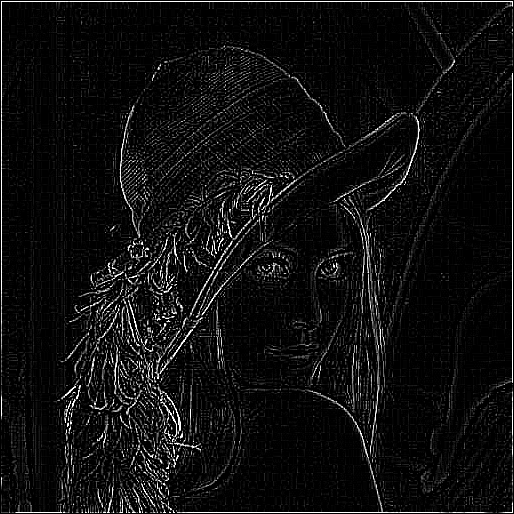

In [36]:
kernel_canny_edge_detection = np.array([
      [-1,-1,-1],
      [-1,8,-1],
      [-1,-1,-1]
  ])

     
filtered_image4 = convolution2d(img_gray, kernel_canny_edge_detection,1,2)
cv2_imshow(filtered_image4)

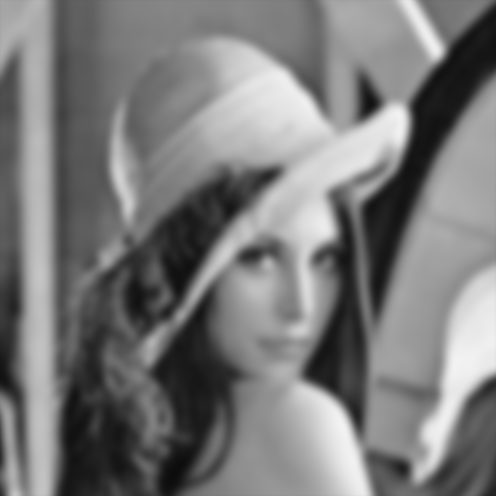

In [37]:
def convolution2d(image, kernel, stride, padding):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape

    out_rows = (image_rows - kernel_rows + 2 * padding) // stride + 1
    out_cols = (image_cols - kernel_cols + 2 * padding) // stride + 1
    output = np.zeros((out_rows, out_cols))
    padded_image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    for row in range(out_rows):
        for col in range(out_cols):
            sum = 0
            for krow in range(kernel_rows):
                for kcol in range(kernel_cols):
                    irow = row * stride + krow
                    icol = col * stride + kcol
                    sum += kernel[krow, kcol] * padded_image[irow, icol]
            output[row, col] = sum
    return output

kernel_size = 21
sigma = np.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

filtered_image5 = convolution2d(img_gray, gauss_kernel,1,2)
cv2_imshow(filtered_image5)

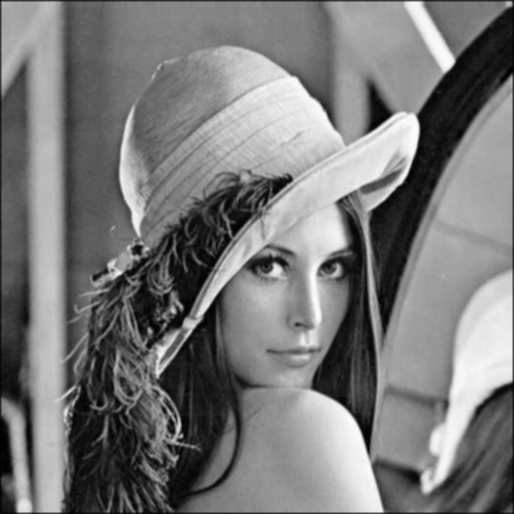

In [38]:
# Average Filter

kernel_size = 3
average_kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

filtered_image6 = convolution2d(img_gray, average_kernel,1,2)
cv2_imshow(filtered_image6)

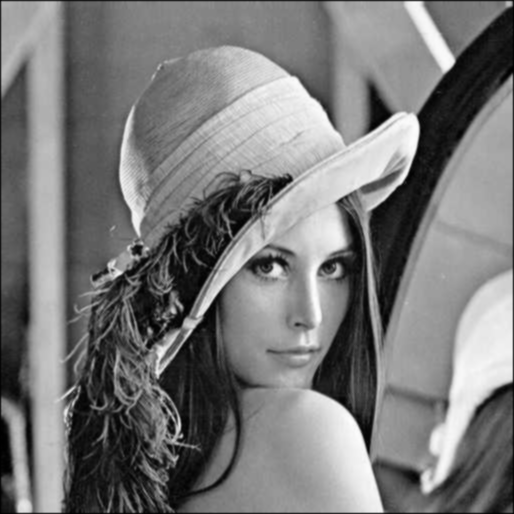

In [39]:
# Low Pass Filter

kernel_low_pass = np.array([
      [1,1,1],
      [1,4,1],
      [1,1,1]
  ]) / 12

filtered_image11 = convolution2d(img_gray, kernel_low_pass,1,2)
cv2_imshow(filtered_image11)

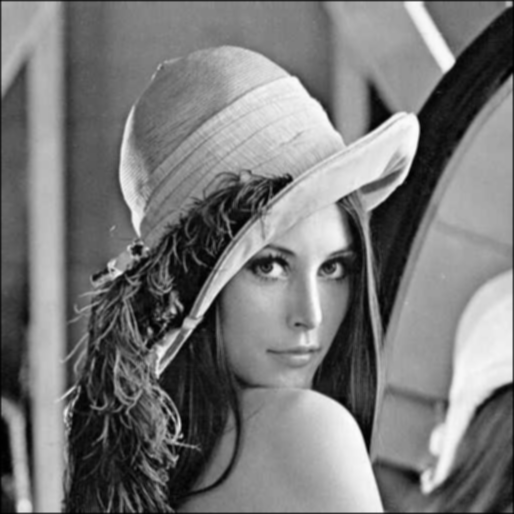

In [40]:
import math

def gaussian_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size))
    center = kernel_size // 2
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = math.exp(-(x**2 + y**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

kernel_size = 3
sigma = 1.4
kernel = gaussian_kernel(kernel_size, sigma)


filtered_image7 = convolution2d(img_gray, kernel,1,2)
cv2_imshow(filtered_image7)

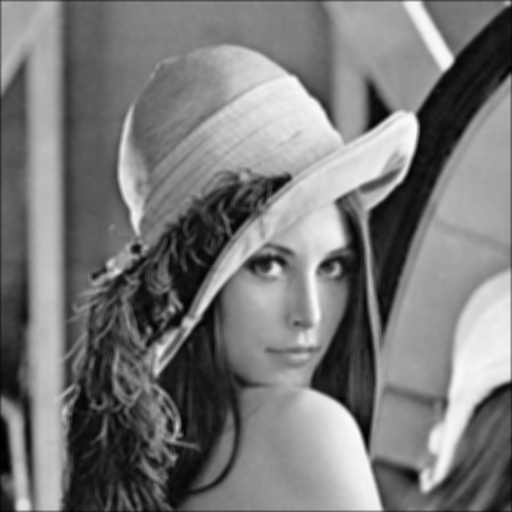

In [41]:
# High Past Filter

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

filtered_image8 = convolution2d(img_gray, kernel,1,2)
cv2_imshow(filtered_image8)

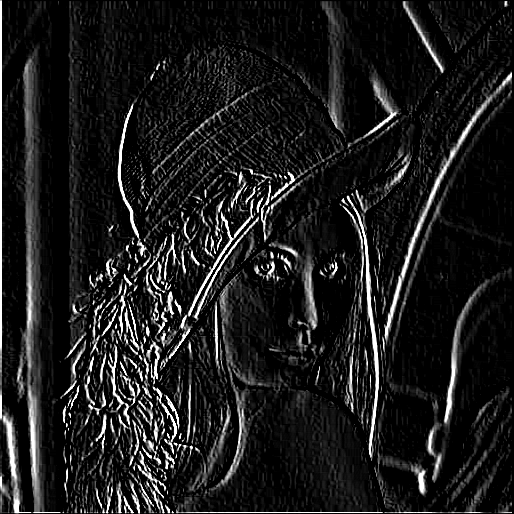

In [42]:
kernel_high_pass = np.array([
      [-1,0,1],
      [-1,0,3],
      [-3,0,1]
  ])

filtered_image9 = convolution2d(img_gray, kernel_high_pass,1,2)
cv2_imshow(filtered_image9)

In [ ]:
kernel_mode = np.ones((3,3))
filtered_image12 = convolution2d(img_gray, kernel_mode,1,2)
cv2_imshow(filtered_image12)

In [44]:
# Median Filter

from cv2 import * #Import functions from OpenCV
import cv2

    # source = cv2.imread('/content/drive/MyDrive/PCVK/mandrill.tiff', CV_LOAD_IMAGE_GRAYSCALE)
final = img_gray[:]
for y in range(len(img_gray)):
  for x in range(y):
      final[y,x]=img_gray[y,x]

members=[img_gray[0,0]]*9
for y in range(1,img_gray.shape[0]-1):
  for x in range(1,img_gray.shape[1]-1):
            members[0] = img_gray[y-1,x-1]
            members[1] = img_gray[y,x-1]
            members[2] = img_gray[y+1,x-1]
            members[3] = img_gray[y-1,x]
            members[4] = img_gray[y,x]
            members[5] = img_gray[y+1,x]
            members[6] = img_gray[y-1,x+1]
            members[7] = img_gray[y,x+1]
            members[8] = img_gray[y+1,x+1]

            members.sort()
            final[y,x]=members[4]

display(final)

array([[174, 173, 173, ..., 187, 158, 116],
       [175, 174, 174, ..., 185, 163, 130],
       [176, 176, 175, ..., 185, 163, 129],
       ...,
       [ 15,  17,  19, ...,  89,  89,  90],
       [ 16,  18,  20, ...,  93,  95,  97],
       [ 18,  20,  22, ...,  96,  99, 103]], dtype=uint8)

array([[174, 173, 173, ..., 187, 158, 116],
       [175, 174, 174, ..., 185, 163, 130],
       [176, 176, 175, ..., 185, 163, 129],
       ...,
       [ 15,  17,  19, ...,  89,  89,  90],
       [ 16,  18,  20, ...,  93,  95,  97],
       [ 18,  20,  22, ...,  96,  99, 103]], dtype=uint8)